In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
file = 'online1.csv'

df = pd.read_csv(file)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df = df.loc[:, ['InvoiceNo', 'Description', 'Country']]

In [8]:
countryList = df['Country'].unique().tolist()

resList = []

for x in countryList:
    resList.append(df[df.Country == x])

print(len(resList))

38


In [ ]:
df = df['France']
df.head(0)

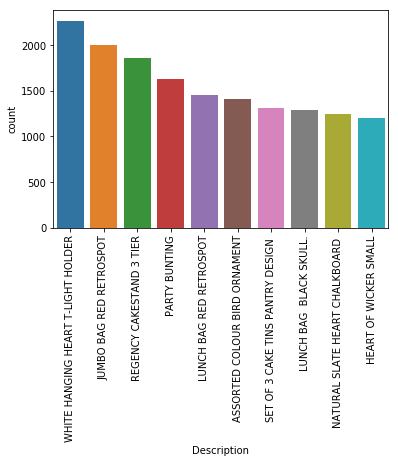

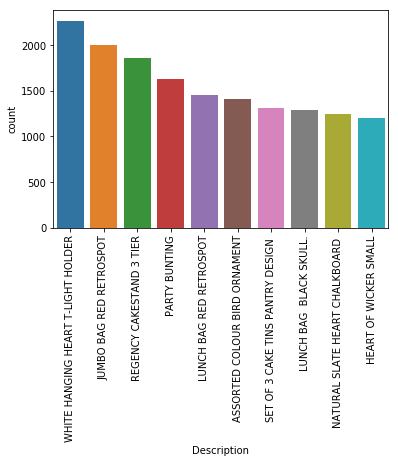

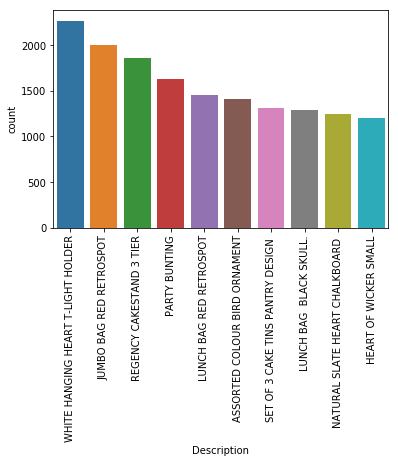

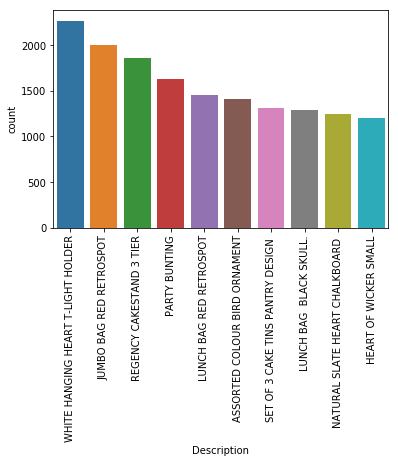

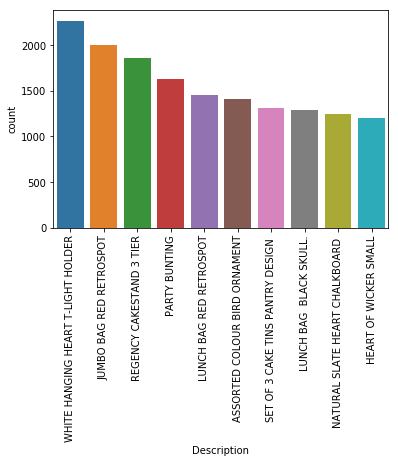

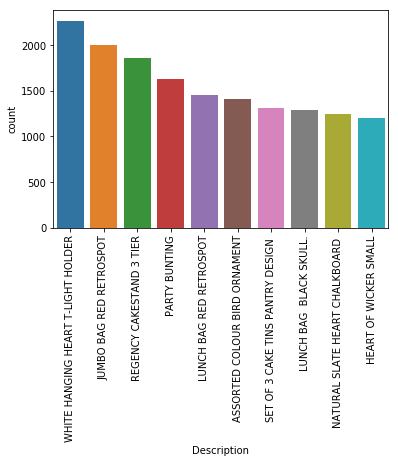

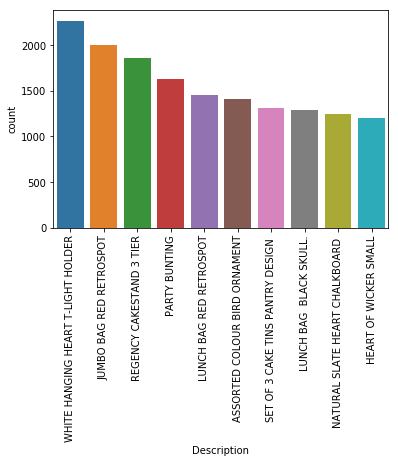

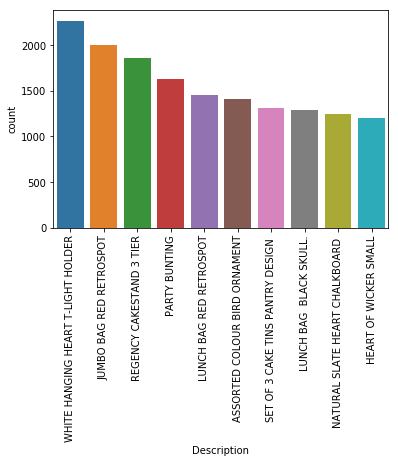

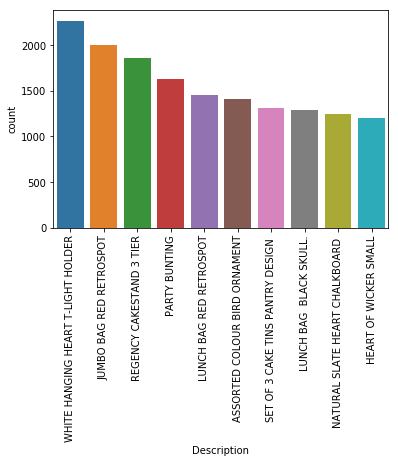

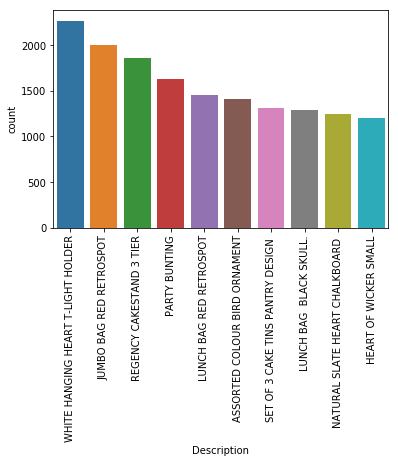

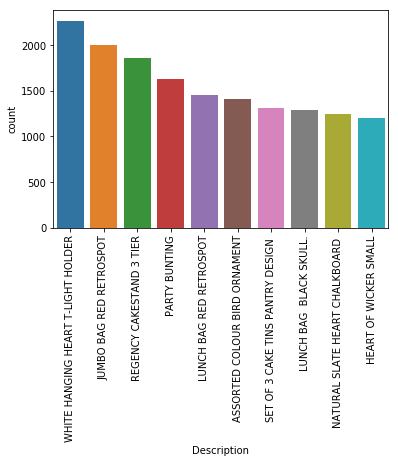

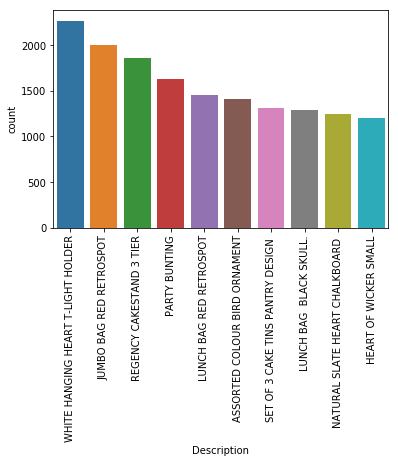

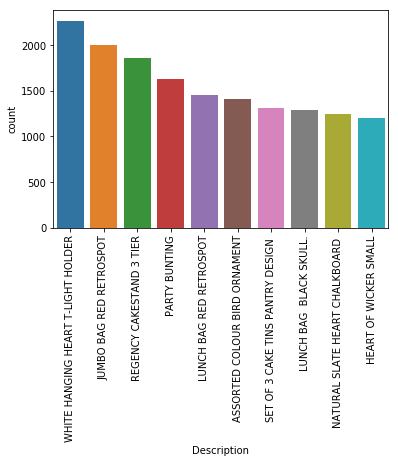

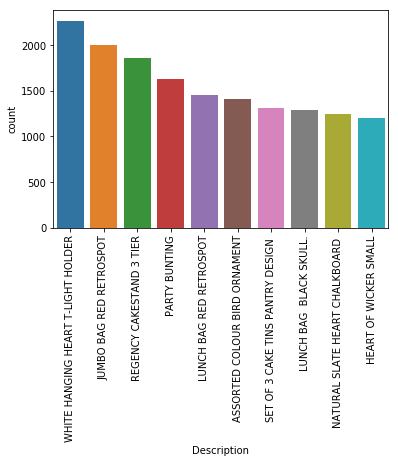

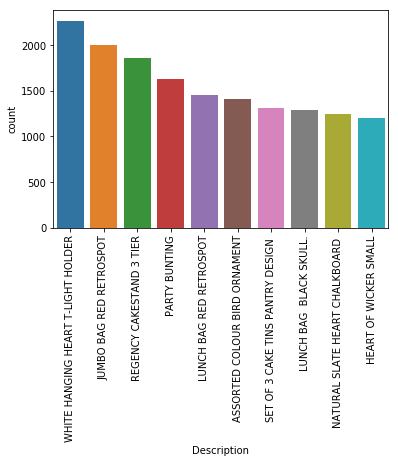

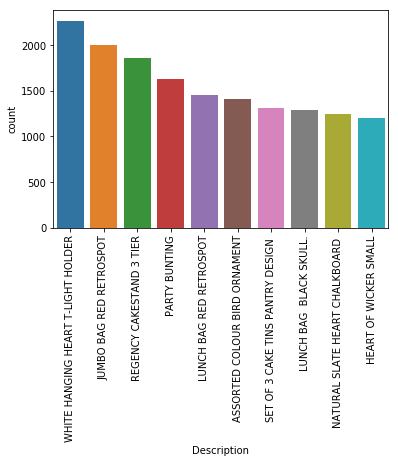

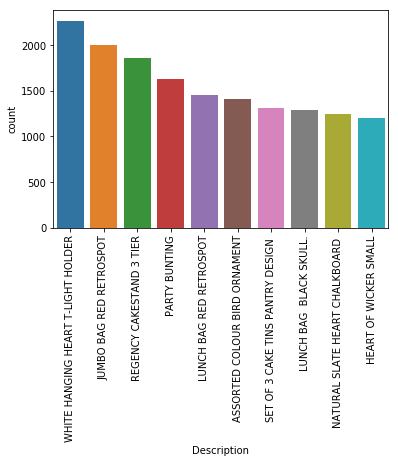

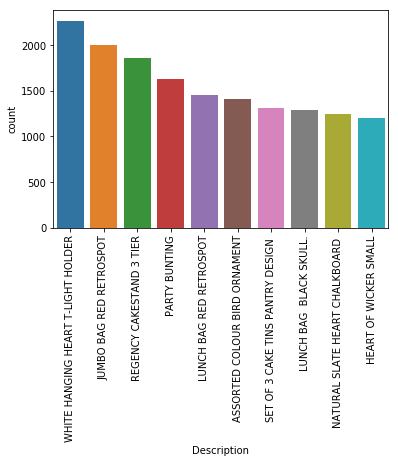

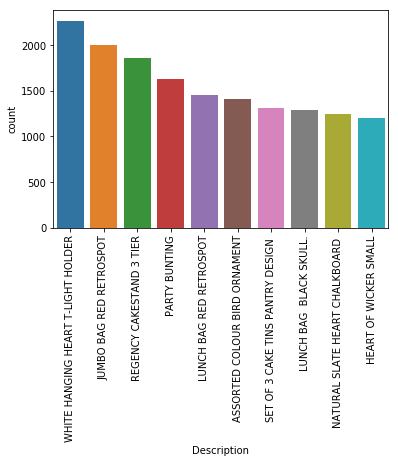

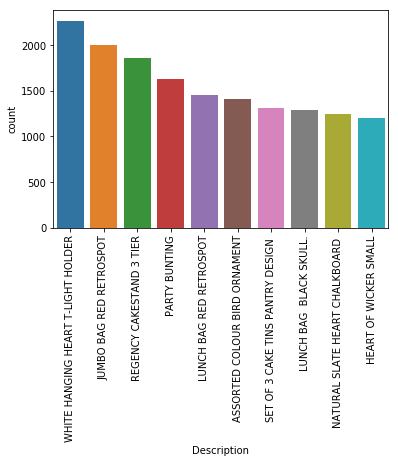

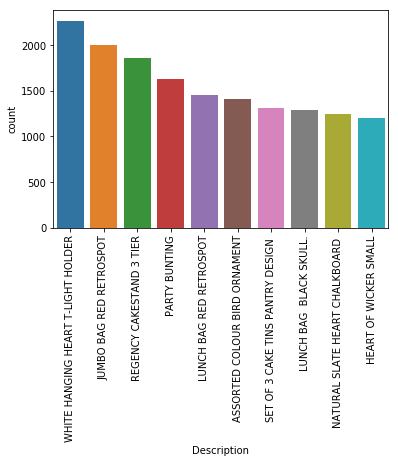

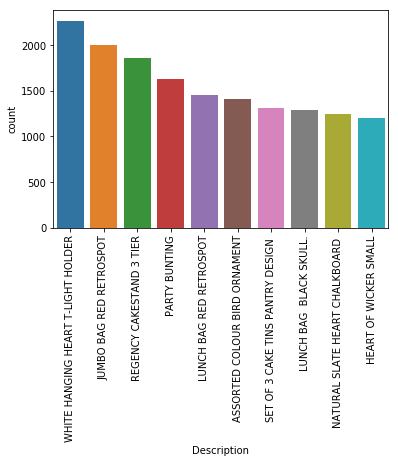

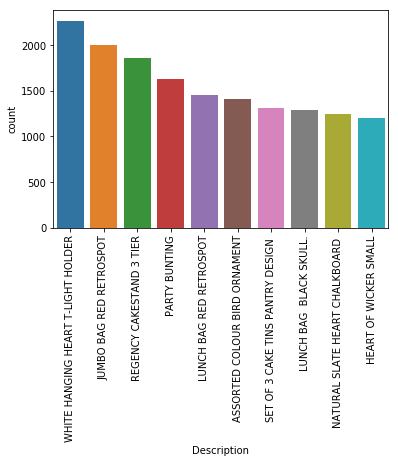

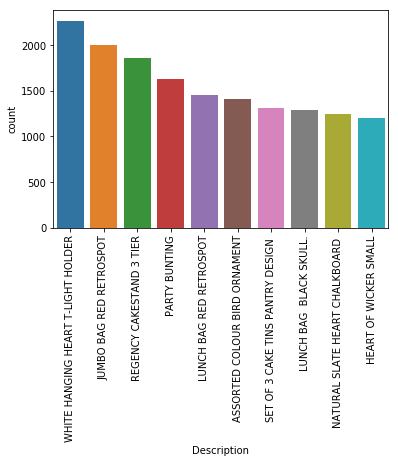

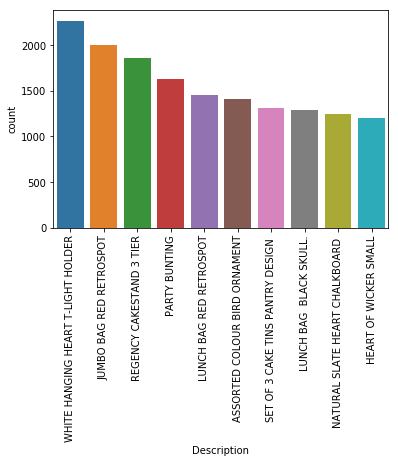

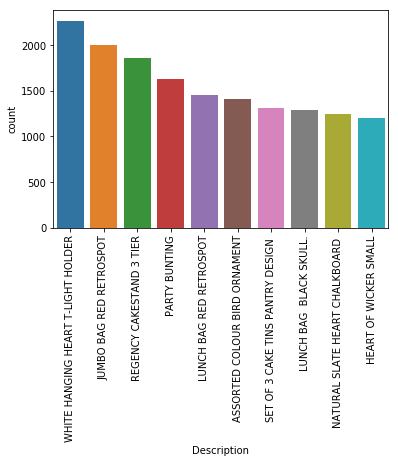

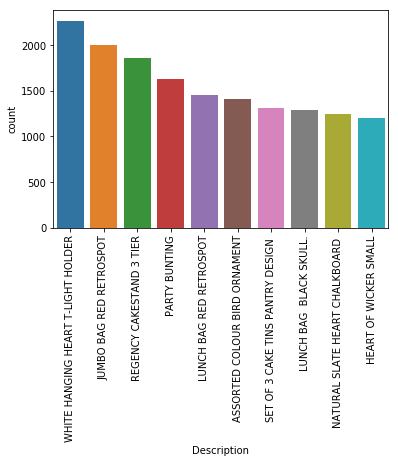

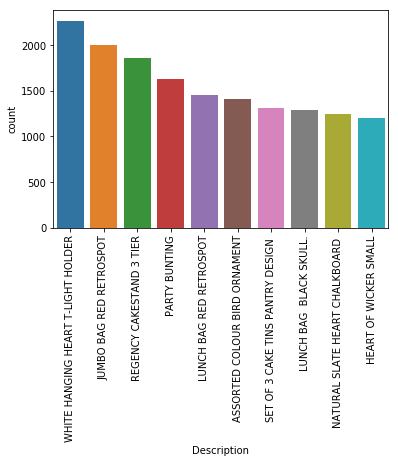

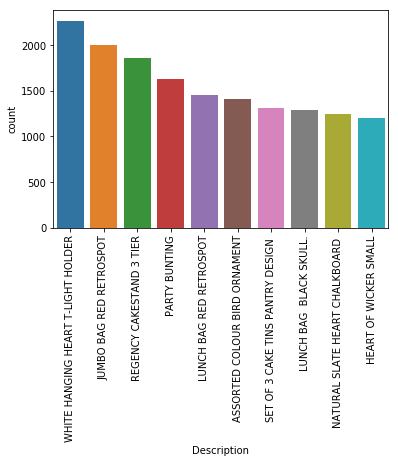

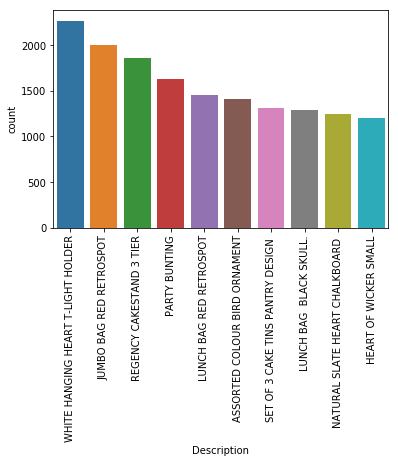

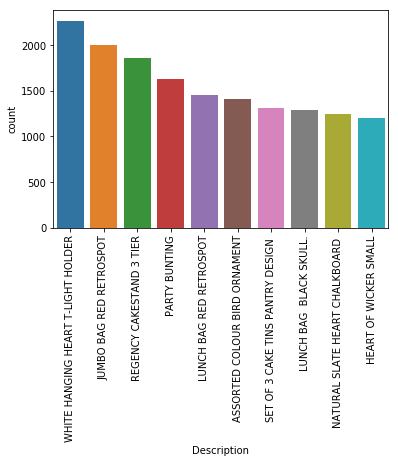

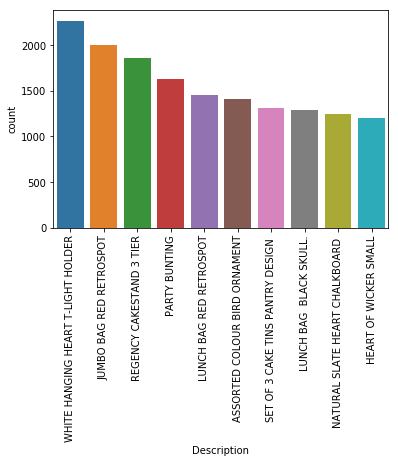

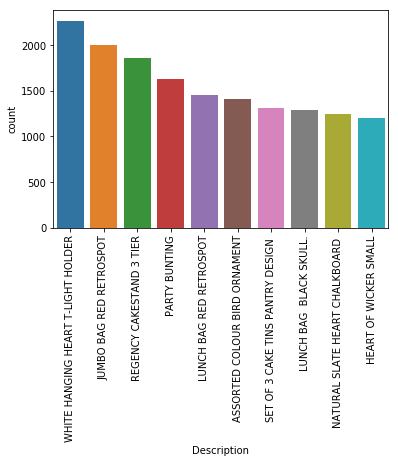

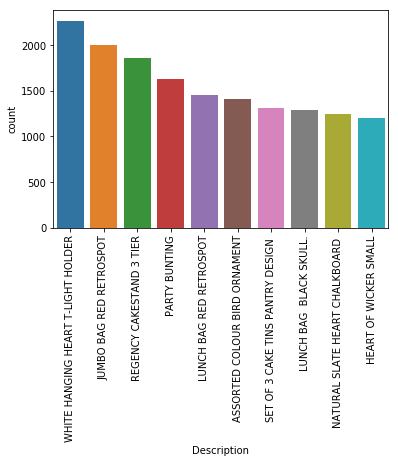

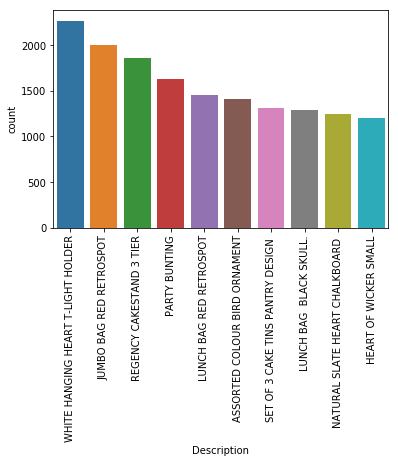

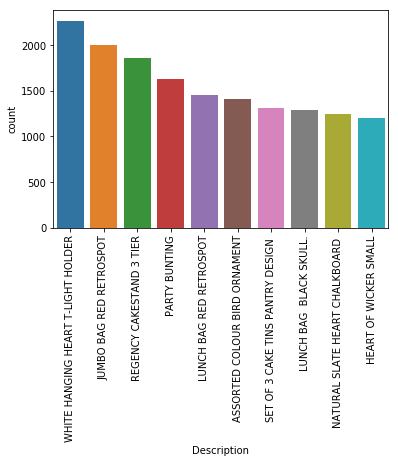

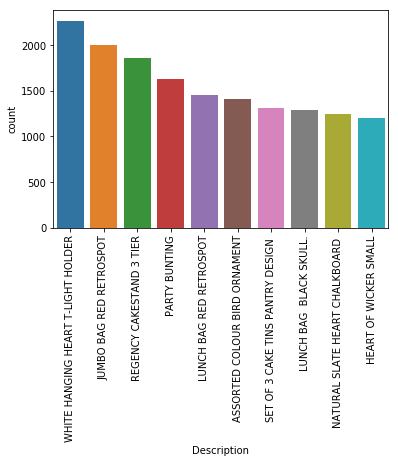

In [9]:
for i in range(0,(len(resList)-1)):
    df = pd.DataFrame(resList[0])
    sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df = df.groupby(['InvoiceNo', 'Description']).size().reset_index(name='count')

basket = (df.groupby(['InvoiceNo', 'Description'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))  # The encoding function


def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


basket_sets = basket.applymap(encode_units)

print(basket_sets.head(10))

frequentItemSets = apriori(basket_sets.head(10), min_support=0.01, use_colnames=True)

rules = association_rules(frequentItemSets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
print(rules.head(10))
